## Exploring the features
I am exploring the data here, to look at their distributions and how each feature might correlate with sale price. Also see which features have missing values and think about ways to impute the missing values.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [2]:
def inspect_boxplot(df, col, include_missing=True):
    print(df[col].value_counts())
    print("{} missing values.".format(df[col].isnull().sum()))
    if include_missing:
        x = df[col].fillna('NaN')
    else:
        x = df[col]
    fig = plt.figure(figsize=(10, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    sns.boxplot(x=x, y=np.log(df['SalePrice']), ax=ax1)
    ax1.set_ylabel('log(SalePrice)')
    sns.countplot(x=x, ax=ax2)
    ax2.set_xlabel(col)
    
def inspect_barplot(df, col, posonly=False, q=5):
    """
    Split the column into q quantiles and make bar plots of the average sale price.
    """
    print("{} out of {} values are missing.".format(df[col].isnull().sum(), len(df)))
    print("{} out of {} values are zero.".format((df[col]==0).sum(), len(df)))
    if posonly:
        g = pd.qcut(df[col][df[col] > 0], q)
    else:
        g = pd.qcut(df[col], q)
    g2 = df[[col, 'SalePrice']]
    g2[col+'Qt'] = g
    g3 = g2.groupby(col+'Qt').median()
#     print(g3)
    fig = plt.figure(figsize=(10, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    sns.barplot(g3.index.values, g3['SalePrice'], ax=ax1)
    h = plt.hist(df[col][df[col].notnull()], bins=20)
    
def inspect_scatterplot(df, col, logx=True):
    print("{} out of {} values are missing.".format(df[col].isnull().sum(), len(df)))
    print("{} out of {} values are zero.".format((df[col]==0).sum(), len(df)))
    fig = plt.figure(figsize=(10, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    logPrice = np.log(df['SalePrice'])
    if logx:
        x = np.log1p(df[col])
        xlabel = 'log({})'.format(col)
    else:
        x = df[col]
        xlabel = col
    ax1.scatter(x, logPrice, s=4)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('log(SalePrice)')
    h = ax2.hist(x[df[col].notnull()], bins=20)
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('Number')
    
def inspect_year(df, col):
    print("{} missing values; {} zeros.".format(df[col].isnull().sum(), (df[col]==0).sum()))
    print("min = {}; max = {}".format(df[col].min(), df[col].max()))
    g = df.groupby(col).median()
    fig = plt.figure(figsize=(10, 4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.plot(g.index, np.log(g.SalePrice))
    ax1.set_xlabel(col)
    ax1.set_ylabel('log(SalePrice)')
    sns.countplot(x=col, data=df, ax=ax2)
    ax2.set_xlabel(col)
    

### Read & explore training data

In [3]:
train = pd.read_csv('train.csv')
# See if there are missing values
N_missing = train.isnull().sum()
print(N_missing[N_missing > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


14


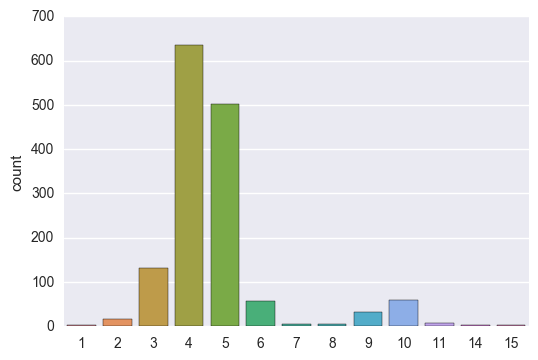

In [4]:
# Are there rows with too many missing values?
x = train.isnull().sum(axis=1)
sns.countplot(x)
print((x > 10).sum())

It looks like several columns have too many missing values to be useful: Alley (94% missing), PoolQC (99% missing), and MiscFeature (96% missing). Two columns also have substantial fraction of missing values: FireplaceQu (47% missing) and Fence (81% missing). Will explore further to see if I should use these two columns.

### Look at SalePrice distribution: are there outliers?

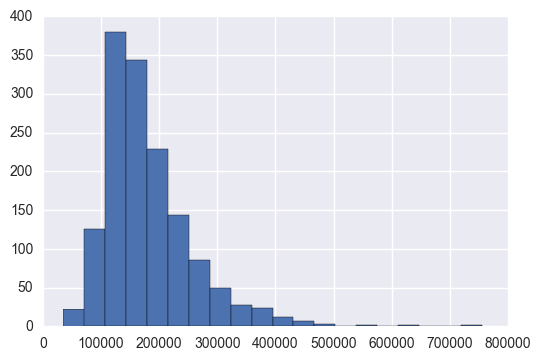

In [5]:
h = plt.hist(train['SalePrice'], bins=20)

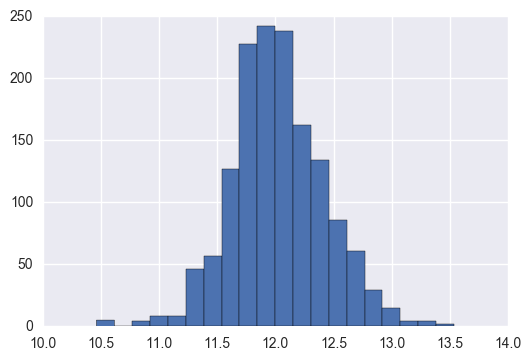

In [6]:
h = plt.hist(np.log(train['SalePrice']), bins=20)

### Now look at how each variable might be correlated with SalePrice

In [7]:
# House ID should not be correlated with SalePrice at all
train['Id'].corr(train['SalePrice'])

-0.021916719443431099

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
0 missing values.


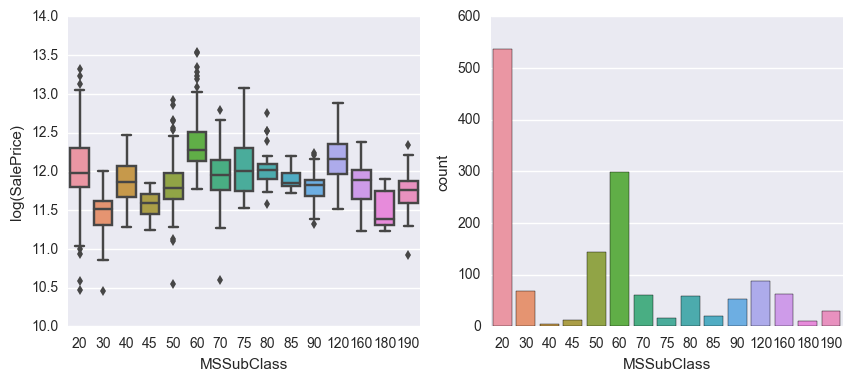

In [8]:
# MSSubClass should be correlated with SalePrice
inspect_boxplot(train, 'MSSubClass')

Looks like these MSSubClass values have the highest SalePrice: 60 (2-STORY 1946 & NEWER), 120 (1-STORY PUD (Planned Unit Development) - 1946 & NEWER), and 20 (1-STORY 1946 & NEWER ALL STYLES).

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
0 missing values.


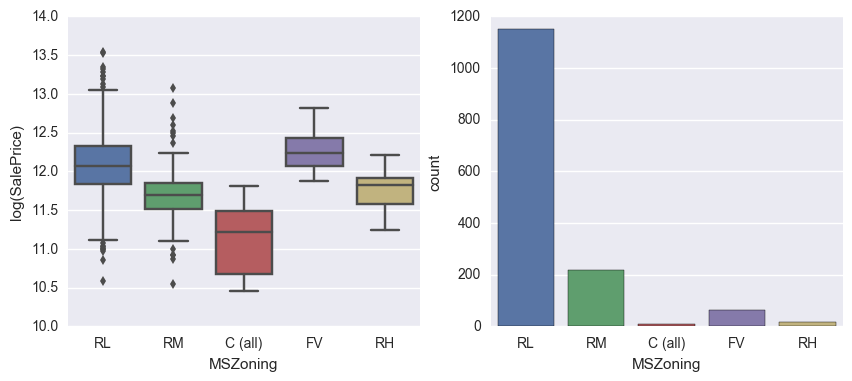

In [9]:
# How about MSZoning?
inspect_boxplot(train, 'MSZoning')

Zoning FV (Flating Village Residential) has the highest average SalePrice. There are only five different zones, although in the description it says there could be 8 possible values.

Correlation between LotFrontage and SalePrice: 0.35
259 out of 1460 values are missing.
0 out of 1460 values are zero.


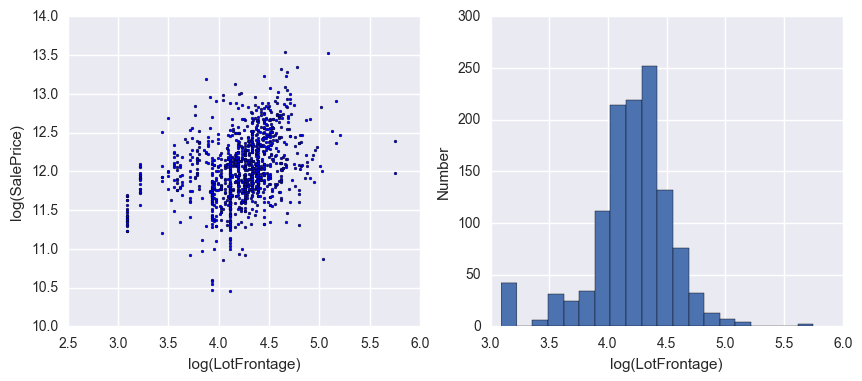

In [10]:
# LotFrontage: I expect this to correlate strongly with SalePrice, although there are some missing values
print("Correlation between LotFrontage and SalePrice: {:.2f}".format(train['LotFrontage'].corr(train['SalePrice'])))
inspect_scatterplot(train, 'LotFrontage')

Correlation between LotArea and SalePrice: 0.26
0 out of 1460 values are missing.
0 out of 1460 values are zero.


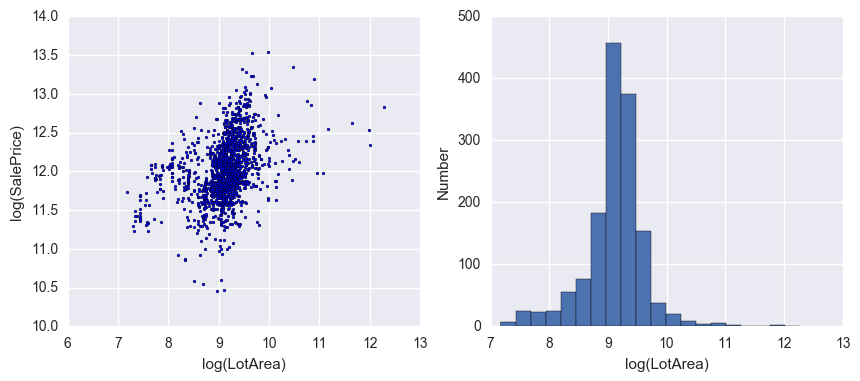

In [11]:
# LotArea: I also expect very strong correlation with SalePrice
# Surprised to see that its correlation is weaker than LotFrontage!
print("Correlation between LotArea and SalePrice: {:.2f}".format(train['LotArea'].corr(train['SalePrice'])))
inspect_scatterplot(train, 'LotArea')

Pave    1454
Grvl       6
Name: Street, dtype: int64
0 missing values.


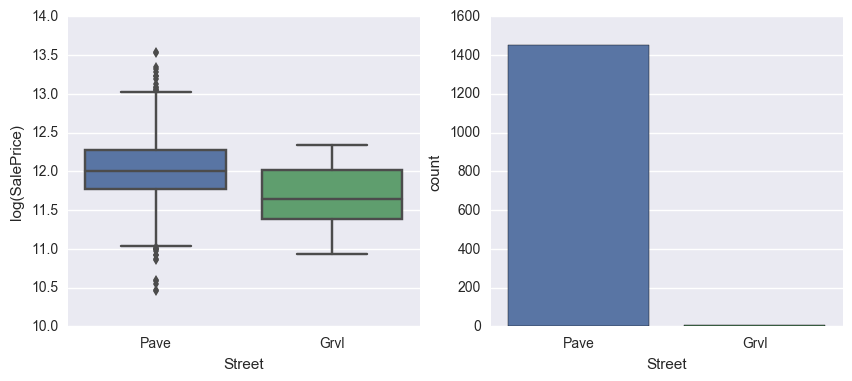

In [12]:
# Street surface type
# Houses with paved street are clearly more expensive
inspect_boxplot(train, 'Street')

Grvl    50
Pave    41
Name: Alley, dtype: int64
1369 missing values.


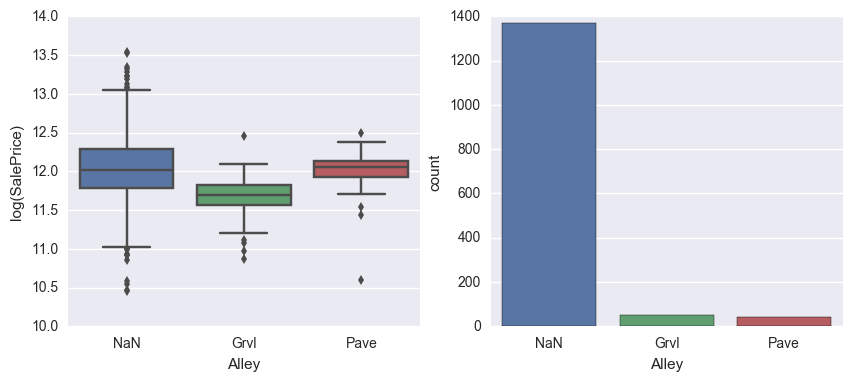

In [13]:
# Alley: we will drop this column b/c of too many missing values
inspect_boxplot(train, 'Alley', include_missing=True)

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
0 missing values.


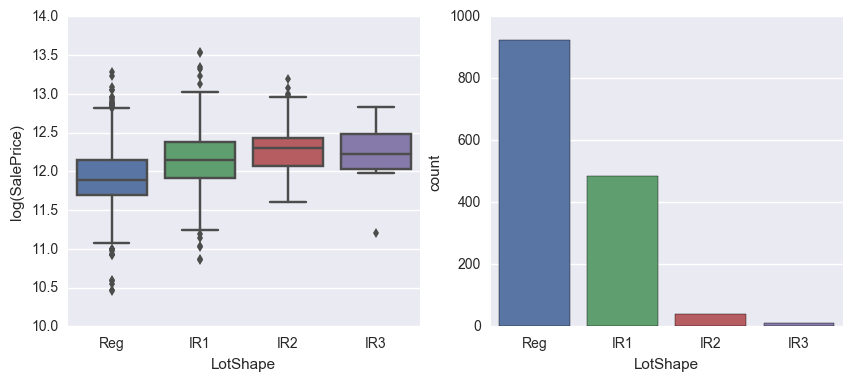

In [14]:
# LotShape
# So people prefer irregular lot shape? Strange.
inspect_boxplot(train, 'LotShape')

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
0 missing values.


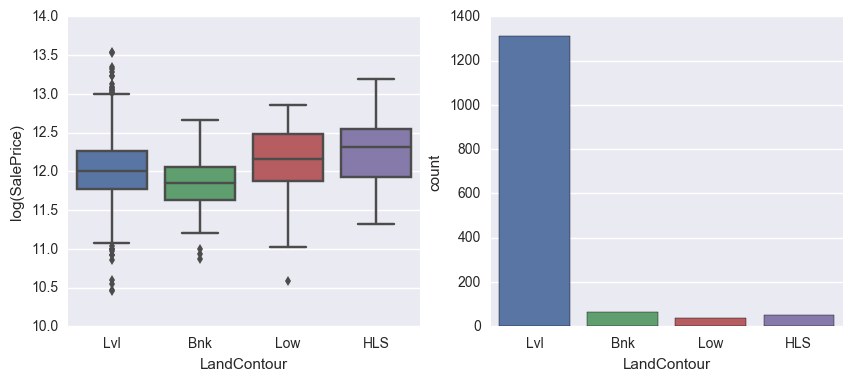

In [15]:
# LandContour
inspect_boxplot(train, 'LandContour')

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
0 missing values.


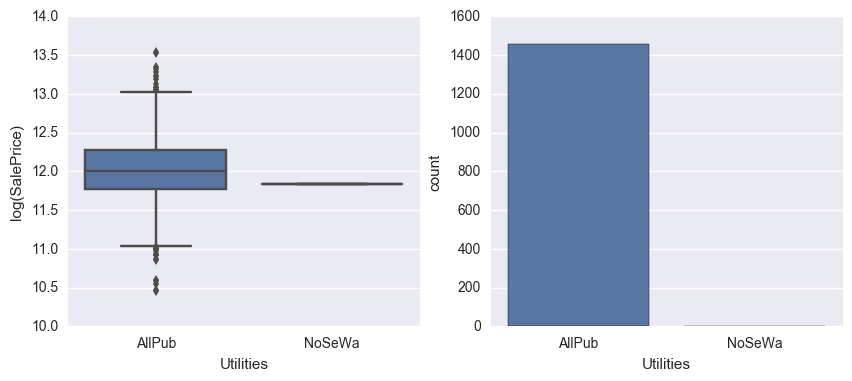

In [16]:
# Utilities
inspect_boxplot(train, 'Utilities')

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
0 missing values.


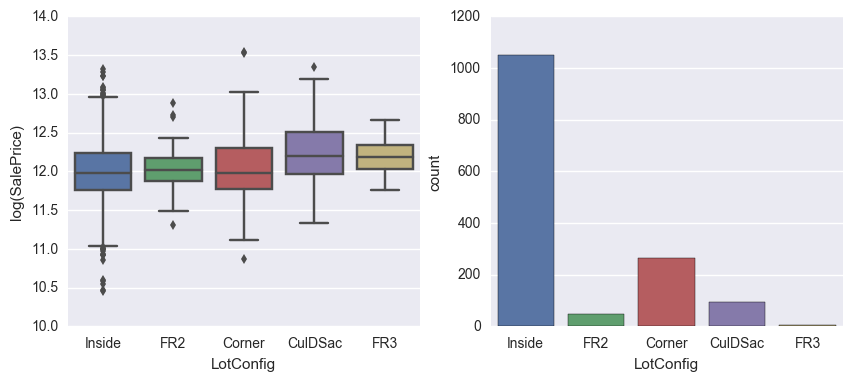

In [17]:
# LotConfig
inspect_boxplot(train, 'LotConfig')

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
0 missing values.


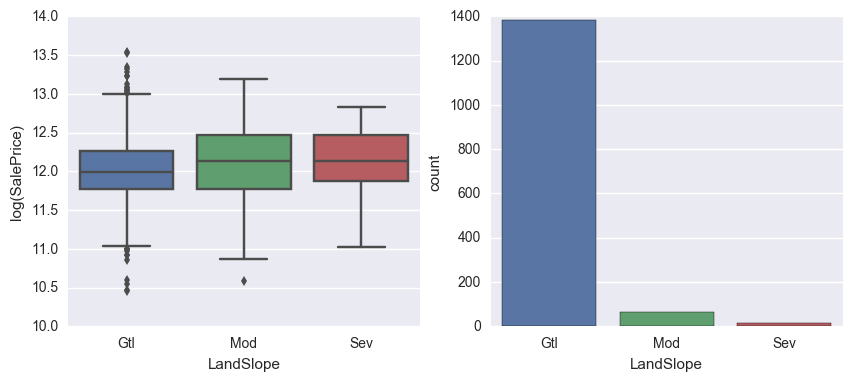

In [18]:
# LandSlope
inspect_boxplot(train, 'LandSlope')

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
0 missing values.


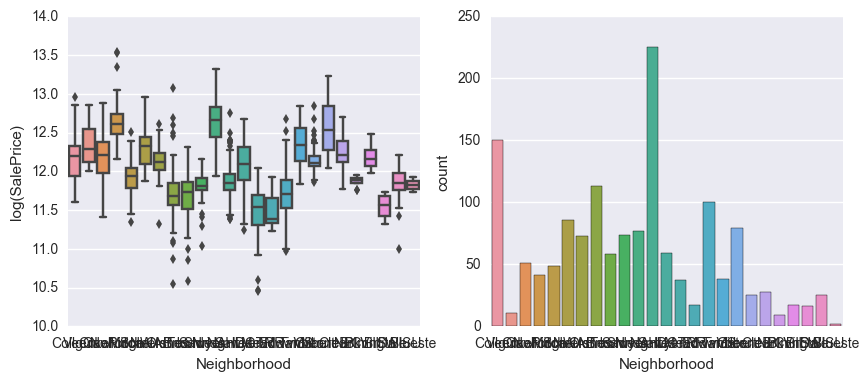

In [19]:
# Neighborhood
inspect_boxplot(train, 'Neighborhood')

Condition1 and Condition2 should be jointly considered later, because one house can have more than 1 special condition.

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
0 missing values.


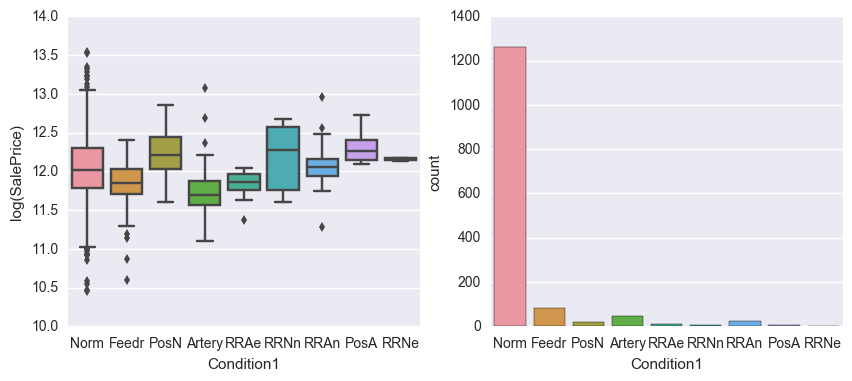

In [20]:
# Condition1
inspect_boxplot(train, 'Condition1')

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64
0 missing values.


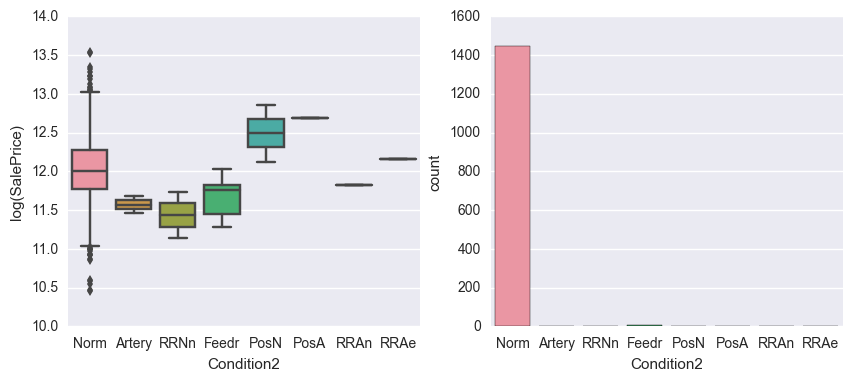

In [21]:
# Condition2
inspect_boxplot(train, 'Condition2')

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
0 missing values.


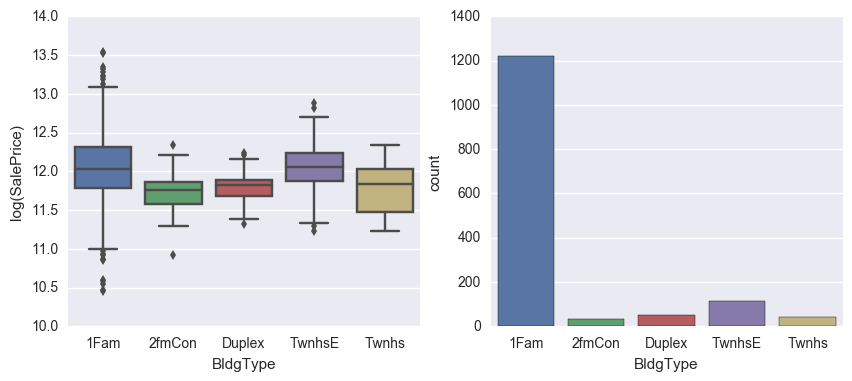

In [22]:
# BldgType
inspect_boxplot(train, 'BldgType')

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
0 missing values.


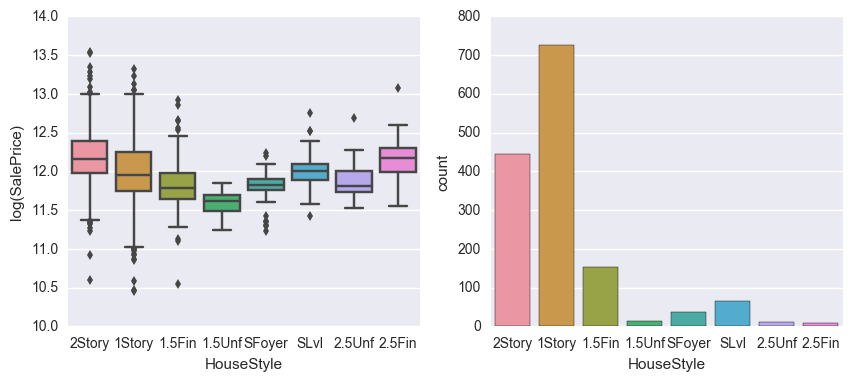

In [23]:
# HouseStyle
inspect_boxplot(train, 'HouseStyle')

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
0 missing values.


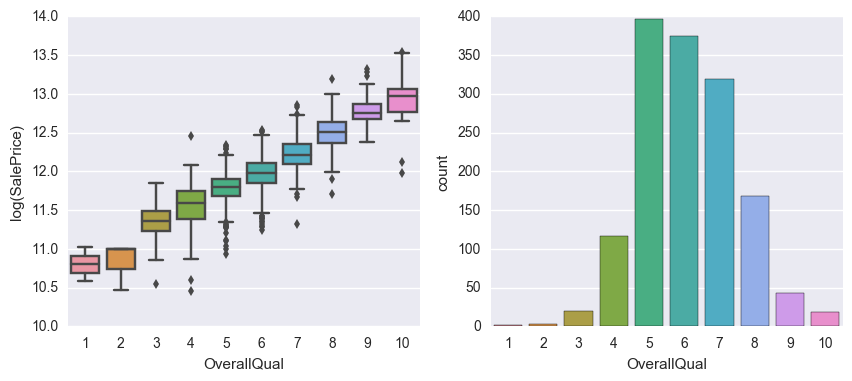

In [24]:
# OverallQual; this should have a very clear correlation with price
inspect_boxplot(train, 'OverallQual')

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
0 missing values.


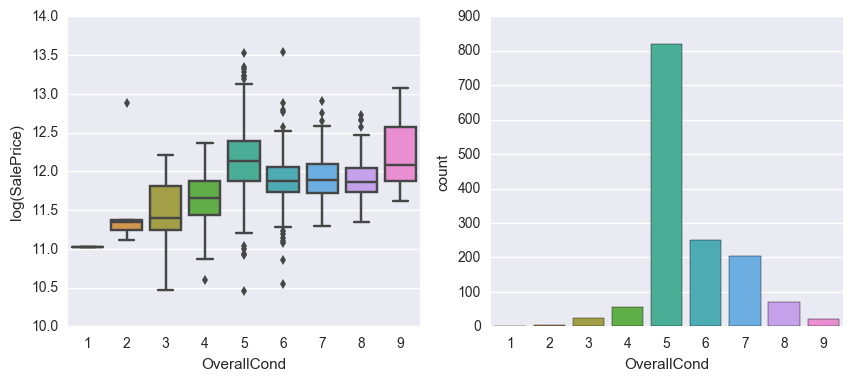

In [25]:
# OverallCond; this column is tricky, because it's not a monotonic correlation with SalePrice
inspect_boxplot(train, 'OverallCond')

In [26]:
# Make sure that OverallQual and OverallCond are not duplicates
train[['OverallQual', 'OverallCond']].corr()

,OverallQual,OverallCond
OverallQual,1.000000,-0.091932
OverallCond,-0.091932,1.000000


0 missing values; 0 zeros.
min = 1872; max = 2010


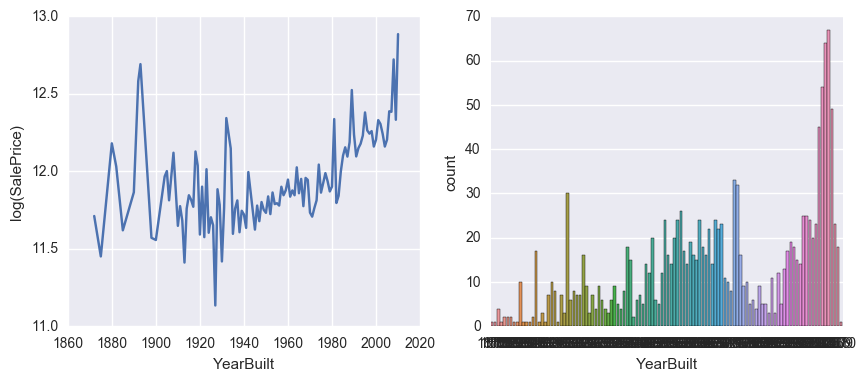

In [27]:
# YearBuilt
# print(train['YearBuilt'].value_counts())
inspect_year(train, 'YearBuilt')

Why are there so many houses that were remodeled in 1950? Was it a place holder for houses that people don't know when it was remodeled?

0 missing values; 0 zeros.
min = 1950; max = 2010


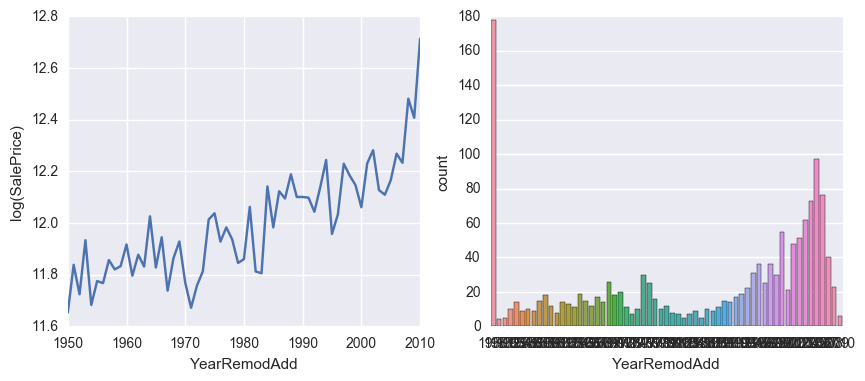

In [28]:
# YearRemodAdd
inspect_year(train, 'YearRemodAdd')

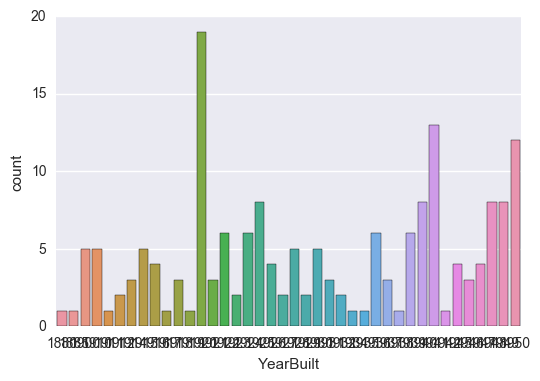

In [29]:
y = (train['YearRemodAdd'] == 1950)
sns.countplot(x=train['YearBuilt'][y])

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
0 missing values.


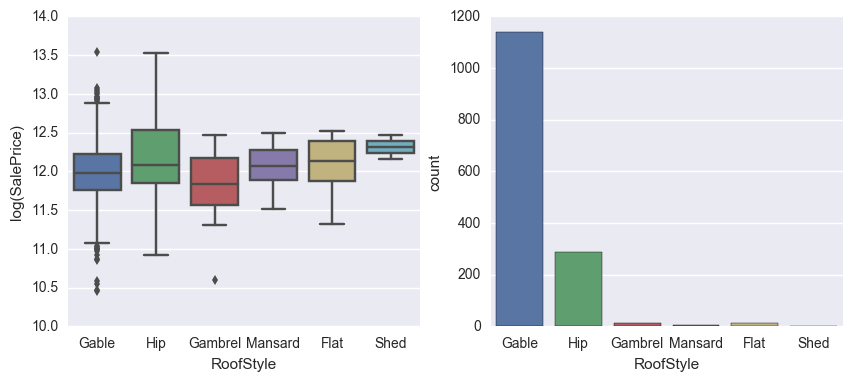

In [30]:
# RoofStyle
inspect_boxplot(train, 'RoofStyle')

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Roll          1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64
0 missing values.


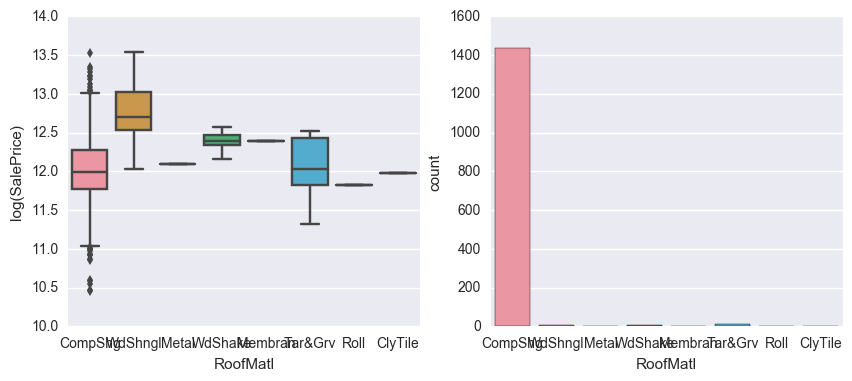

In [31]:
# RoofMatl
inspect_boxplot(train, 'RoofMatl')

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64
0 missing values.


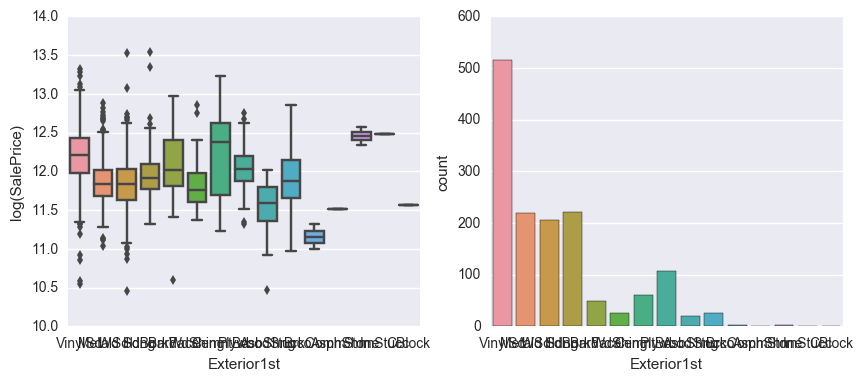

In [32]:
# Exterior1st and Exterior2nd should be considered together
inspect_boxplot(train, 'Exterior1st')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
8 missing values.


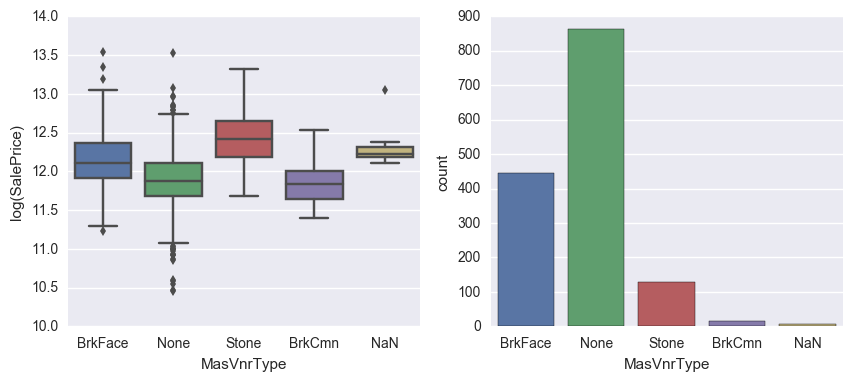

In [33]:
# MasVnrType
inspect_boxplot(train, 'MasVnrType', include_missing=True)

8 out of 1460 values are missing.
861 out of 1460 values are zero.


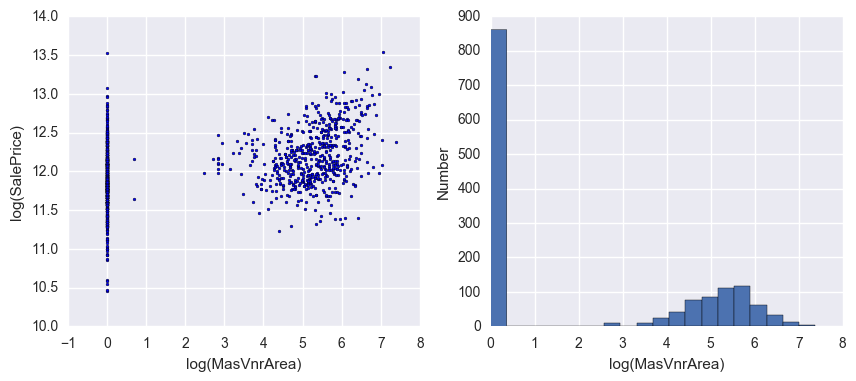

In [34]:
# MasVnrArea
inspect_scatterplot(train, 'MasVnrArea', logx=True)

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
0 missing values.


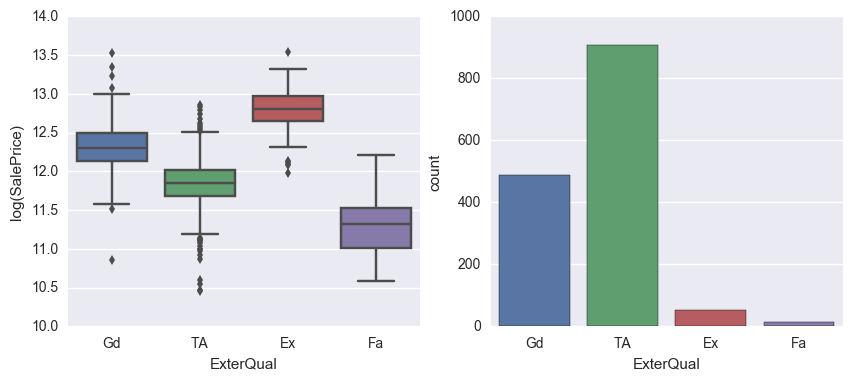

In [35]:
# ExterQual
inspect_boxplot(train, 'ExterQual')

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
0 missing values.


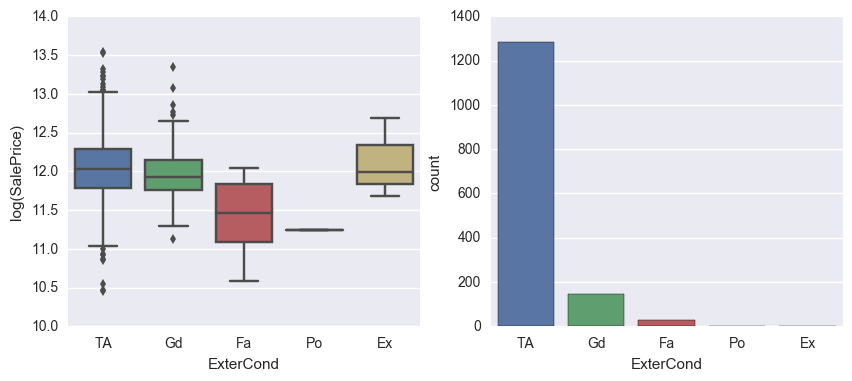

In [36]:
# ExterCond
inspect_boxplot(train, 'ExterCond')

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
0 missing values.


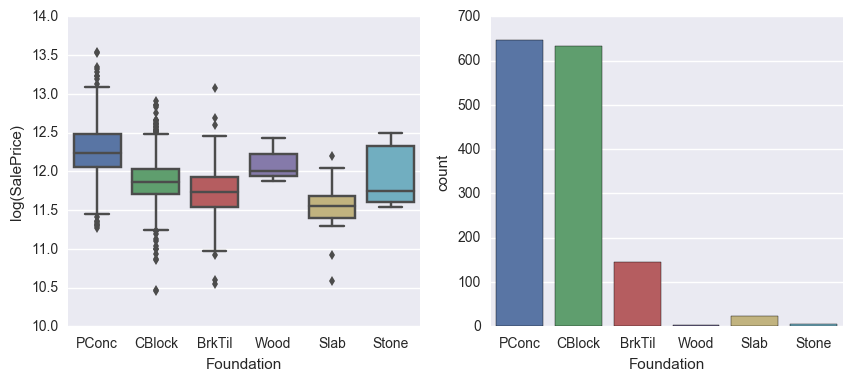

In [37]:
# Foundation
inspect_boxplot(train, 'Foundation')

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
37 missing values.


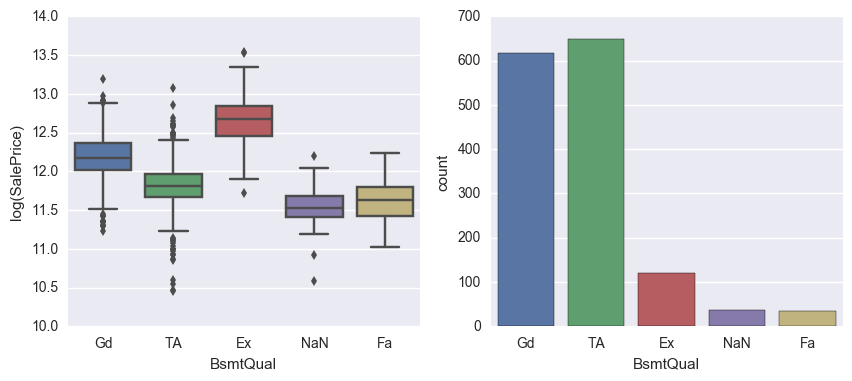

In [38]:
# BsmtQual
inspect_boxplot(train, 'BsmtQual', include_missing=True)

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
37 missing values.


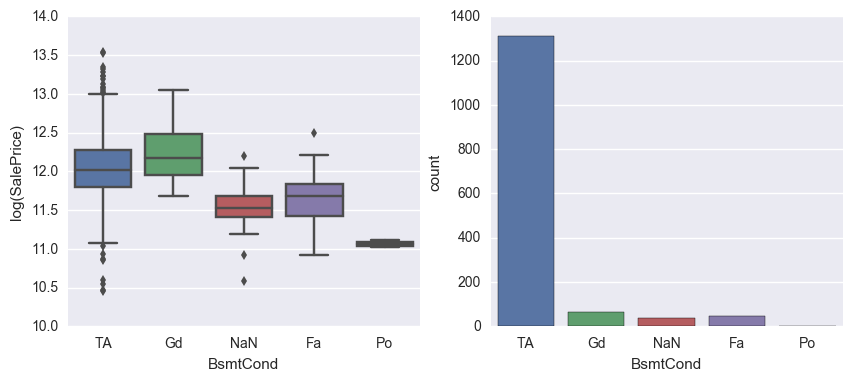

In [39]:
# BsmtCond
inspect_boxplot(train, 'BsmtCond', include_missing=True)

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
38 missing values.


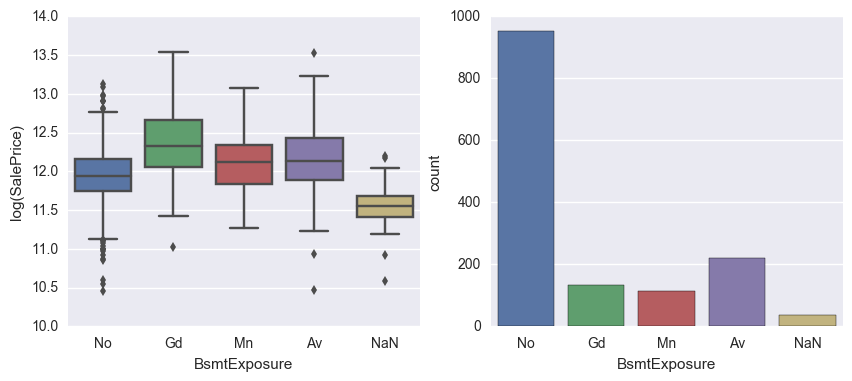

In [40]:
# BsmtExposure
inspect_boxplot(train, 'BsmtExposure', include_missing=True)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
37 missing values.


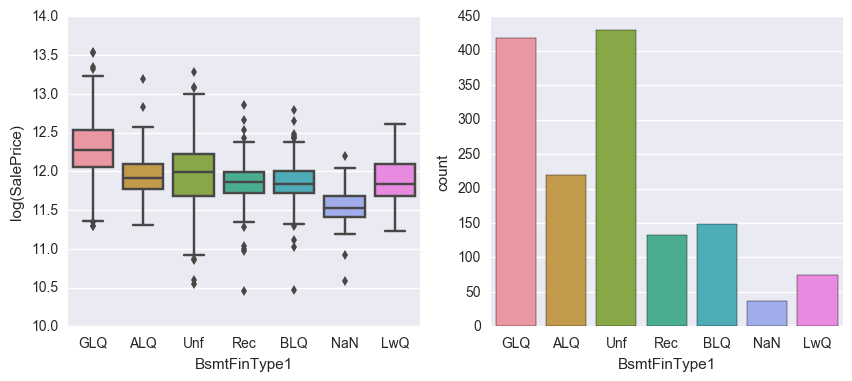

In [41]:
# Consider BsmtFinTyle1 and BsmtFinType2 together
# Will also need to incoporate the are of each finish type
inspect_boxplot(train, 'BsmtFinType1', include_missing=True)

0 out of 1460 values are missing.
467 out of 1460 values are zero.


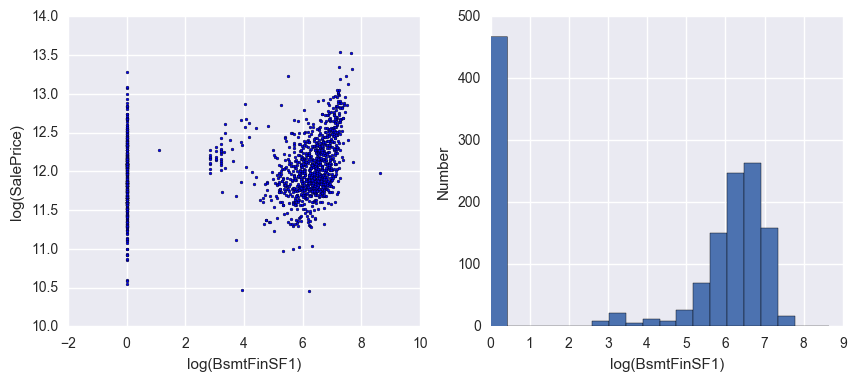

In [42]:
# BsmtFinSF1
inspect_scatterplot(train, 'BsmtFinSF1')

0 out of 1460 values are missing.
1293 out of 1460 values are zero.


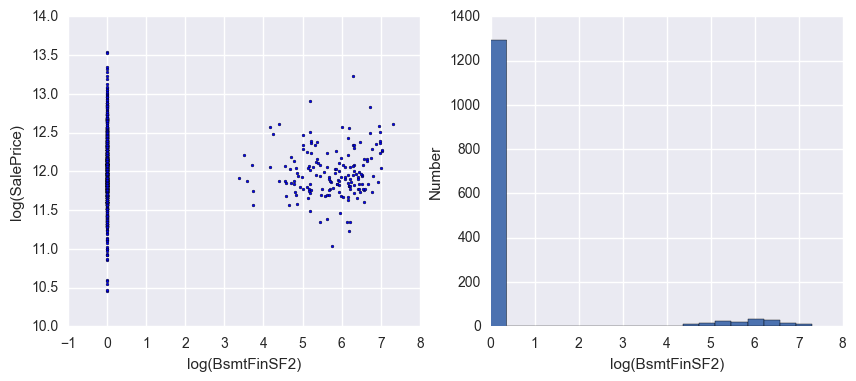

In [43]:
# BsmtFinSF2
inspect_scatterplot(train, 'BsmtFinSF2')

0 out of 1460 values are missing.
467 out of 1460 values are zero.


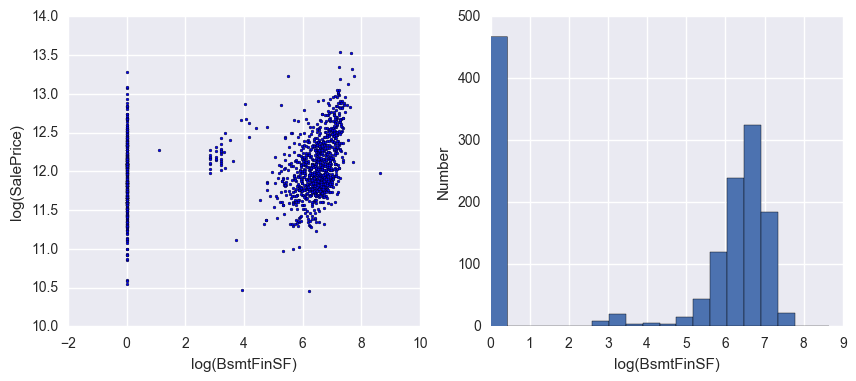

In [44]:
train['BsmtFinSF'] = train['BsmtFinSF1'] + train['BsmtFinSF2']
inspect_scatterplot(train, 'BsmtFinSF')

0 out of 1460 values are missing.
118 out of 1460 values are zero.


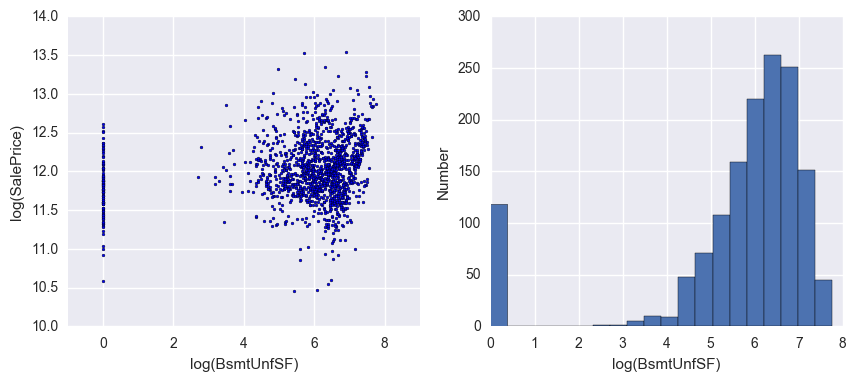

In [45]:
# BsmtUnfSF
inspect_scatterplot(train, 'BsmtUnfSF', logx=True)

0 out of 1460 values are missing.
37 out of 1460 values are zero.


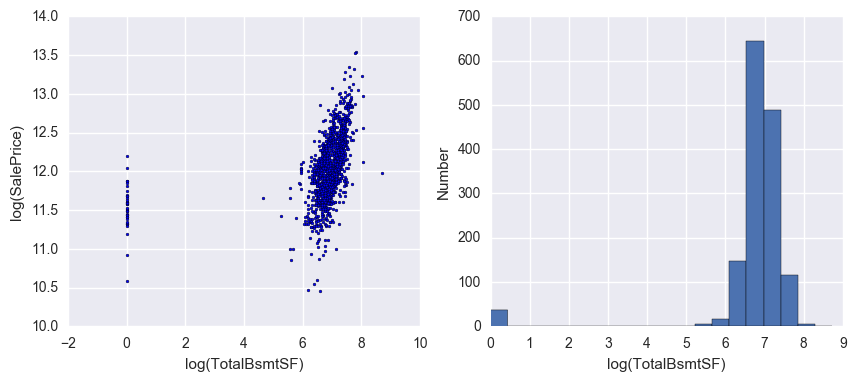

In [46]:
# TotalBsmtSF
inspect_scatterplot(train, 'TotalBsmtSF', logx=True)

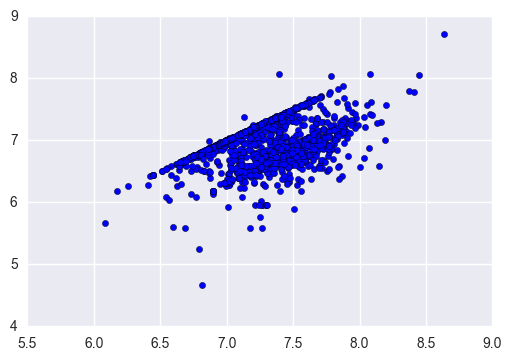

In [47]:
pos = (train['TotalBsmtSF'] > 0)
plt.scatter(np.log1p(train['GrLivArea'])[pos], np.log1p(train['TotalBsmtSF'])[pos])

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
0 missing values.


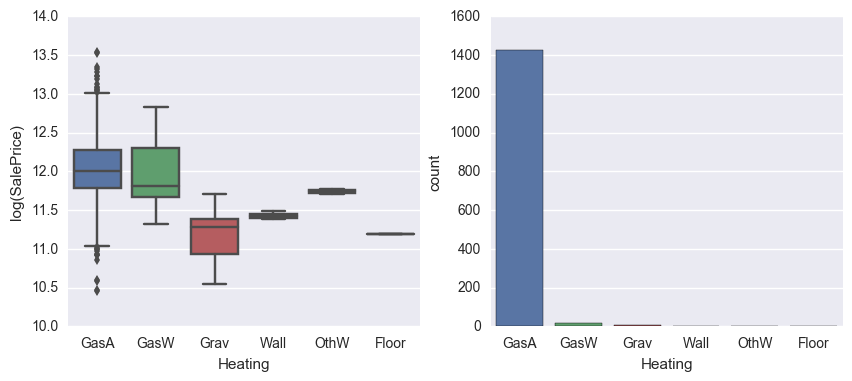

In [48]:
# Heating
inspect_boxplot(train, 'Heating')

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
0 missing values.


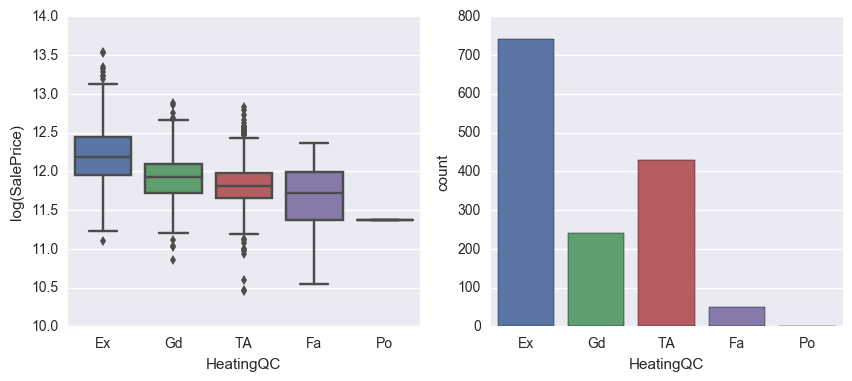

In [49]:
# HeatingQC
inspect_boxplot(train, 'HeatingQC')

Y    1365
N      95
Name: CentralAir, dtype: int64
0 missing values.


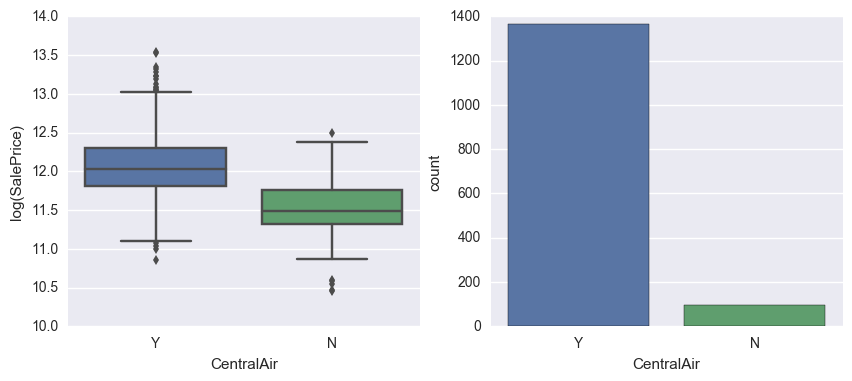

In [50]:
# CentralAir
inspect_boxplot(train, 'CentralAir')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
1 missing values.


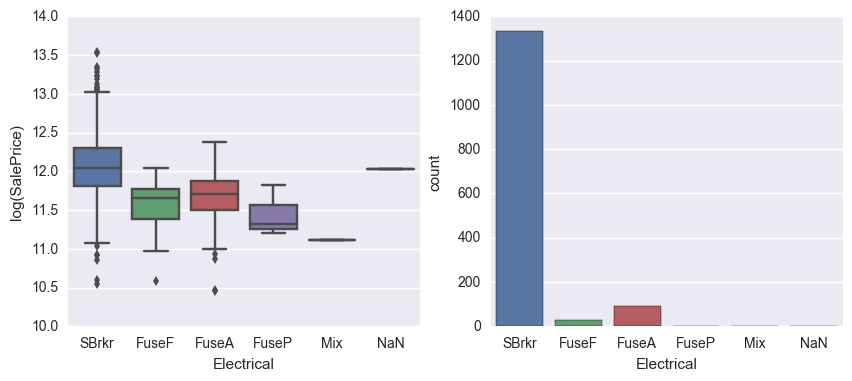

In [51]:
# Electrical
inspect_boxplot(train, 'Electrical', include_missing=True)

0 out of 1460 values are missing.
0 out of 1460 values are zero.


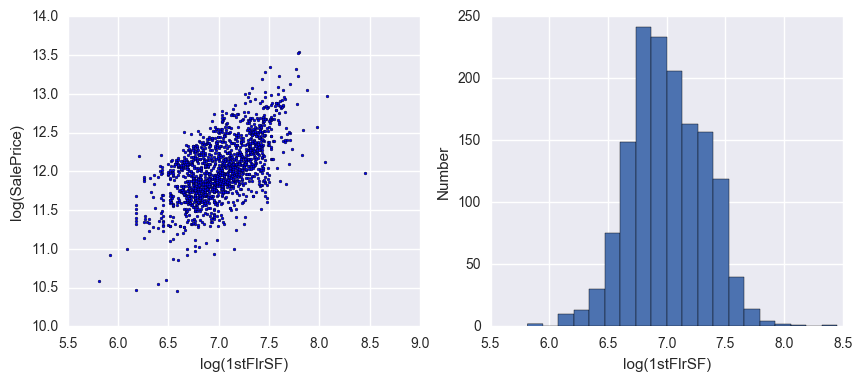

In [52]:
# 1stFlrSF
inspect_scatterplot(train, '1stFlrSF')

0 out of 1460 values are missing.
829 out of 1460 values are zero.


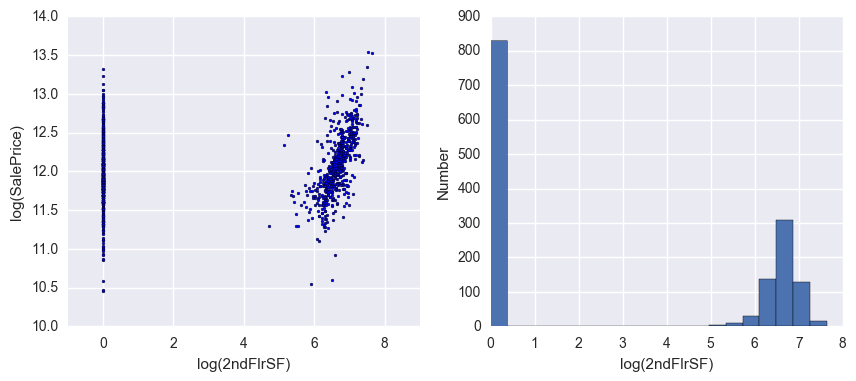

In [53]:
# 2ndFlrSF
inspect_scatterplot(train, '2ndFlrSF')

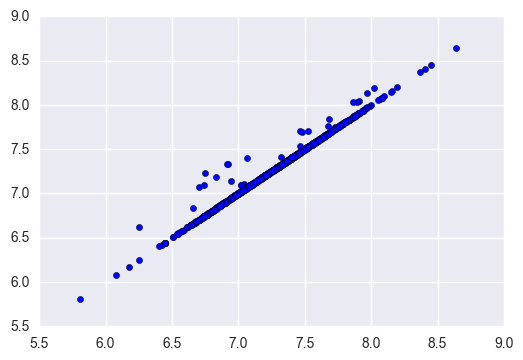

In [54]:
x = np.log(train['1stFlrSF'] + train['2ndFlrSF'])
y = np.log(train['GrLivArea'])
plt.scatter(x, y)

0 out of 1460 values are missing.
1434 out of 1460 values are zero.


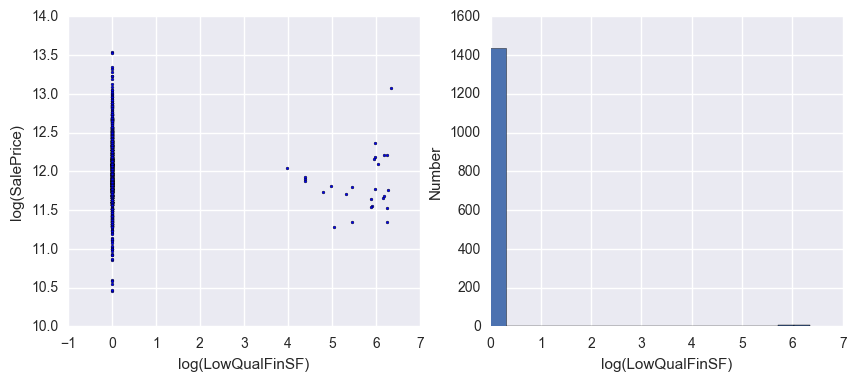

In [55]:
# LowQualFinSF; may not have a strong correlation with SalePrice?
inspect_scatterplot(train, 'LowQualFinSF')

0 out of 1460 values are missing.
0 out of 1460 values are zero.


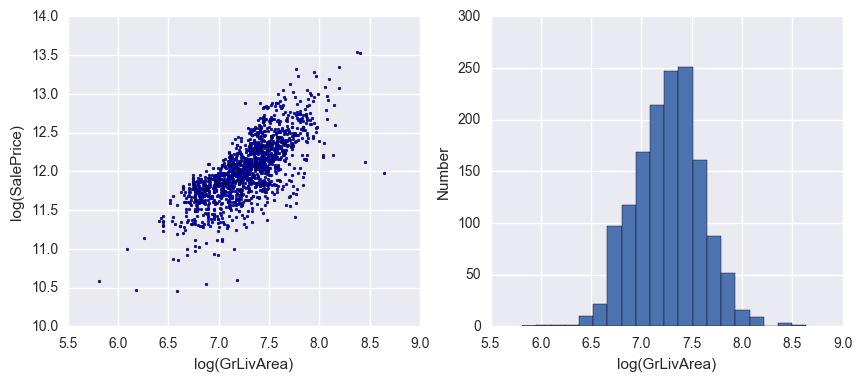

In [56]:
# GrLivArea
inspect_scatterplot(train, 'GrLivArea')

0.0    783
1.0    581
0.5     71
2.0     15
1.5      9
3.0      1
Name: BsmtBath, dtype: int64
0 missing values.


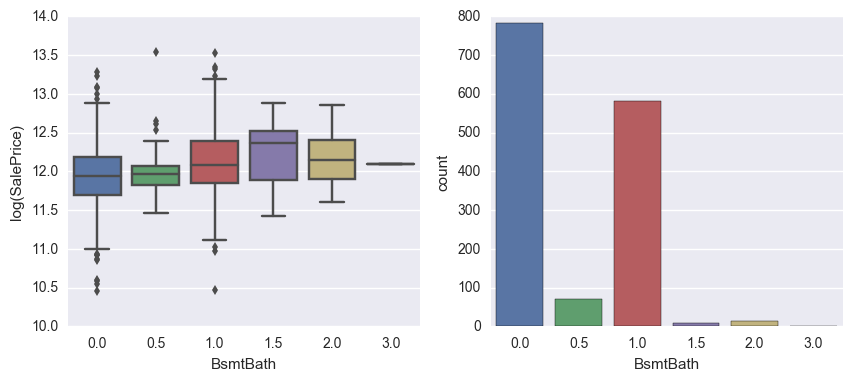

In [57]:
# Should combine BsmtFullBath and BsmtHalfBath
train['BsmtBath'] = train['BsmtFullBath'] + 0.5 * train['BsmtHalfBath']
inspect_boxplot(train, 'BsmtBath')

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
0 missing values.


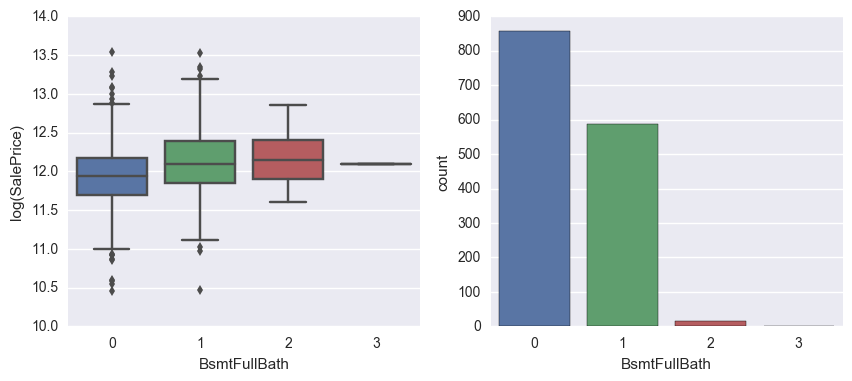

In [58]:
inspect_boxplot(train, 'BsmtFullBath', include_missing=True)

1.0    469
2.0    433
2.5    334
1.5    180
3.0     20
3.5     18
0.0      3
0.5      3
Name: Bath, dtype: int64
0 missing values.


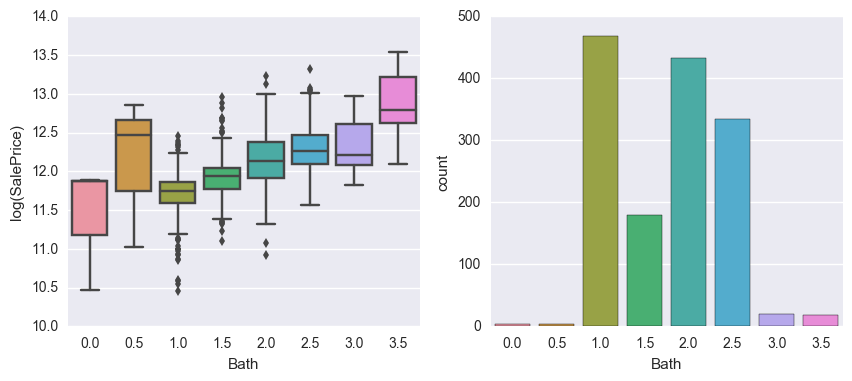

In [59]:
# Also should combine FullBath and HalfBath
train['Bath'] = train['FullBath'] + 0.5 * train['HalfBath']
inspect_boxplot(train, 'Bath')

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
0 missing values.


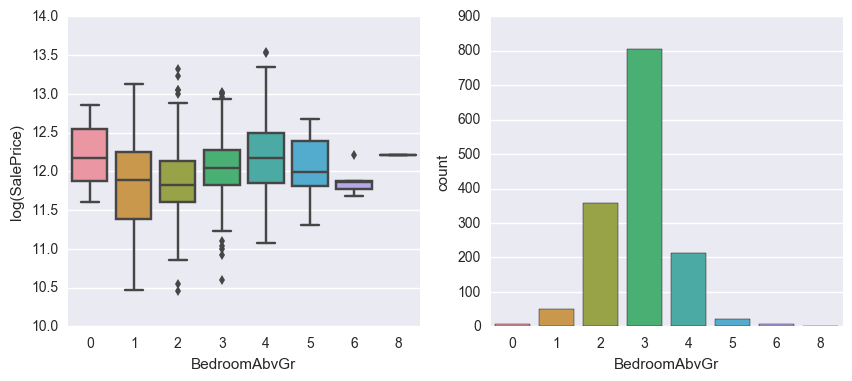

In [60]:
# BedroomAbvGr
inspect_boxplot(train, 'BedroomAbvGr')

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
0 missing values.


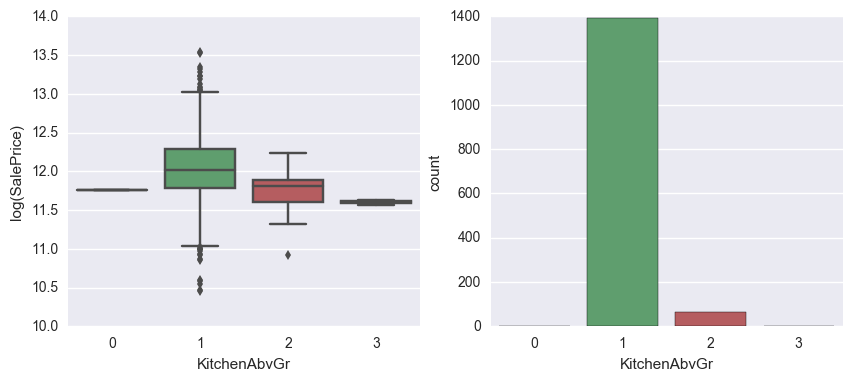

In [61]:
# KitchenAbvGr; is this a useful feature??
inspect_boxplot(train, 'KitchenAbvGr')

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
0 missing values.


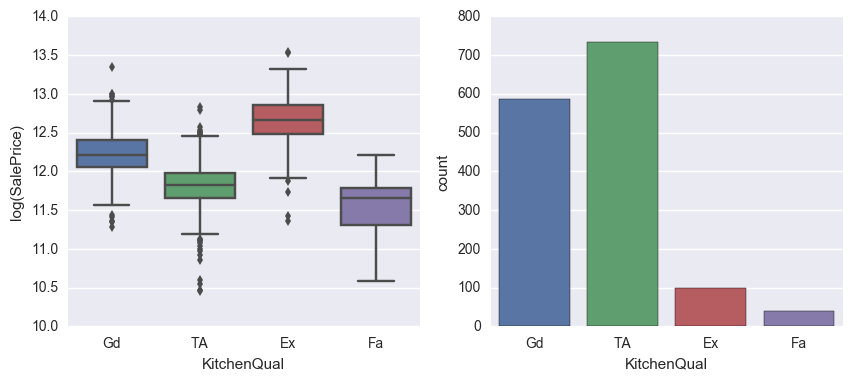

In [62]:
inspect_boxplot(train, 'KitchenQual', include_missing=True)

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64
0 missing values.


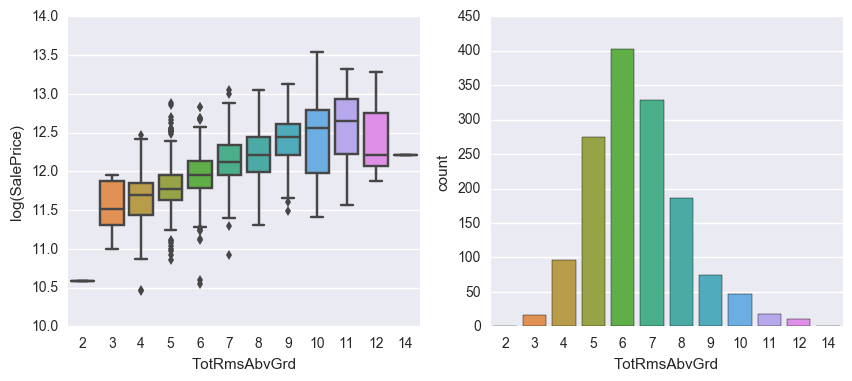

In [63]:
# TotRmsAbvGrd
inspect_boxplot(train, 'TotRmsAbvGrd')

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
0 missing values.


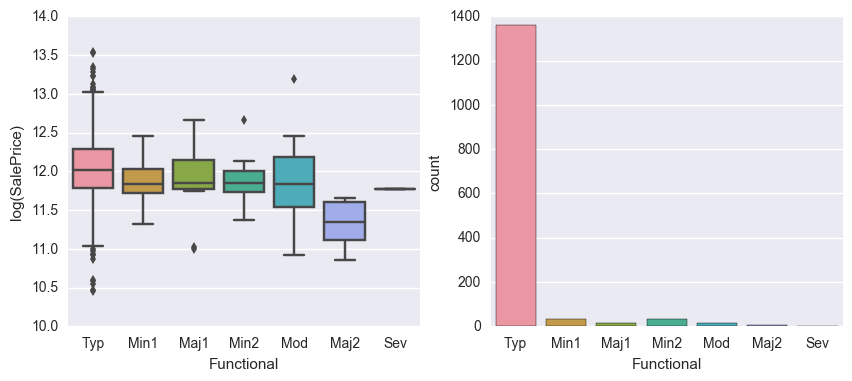

In [64]:
# Functional
inspect_boxplot(train, 'Functional')

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
0 missing values.


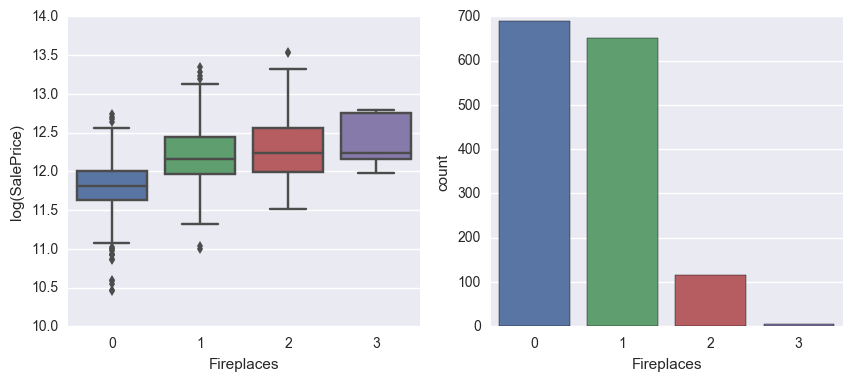

In [65]:
# Fireplaces
inspect_boxplot(train, 'Fireplaces')

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
690 missing values.


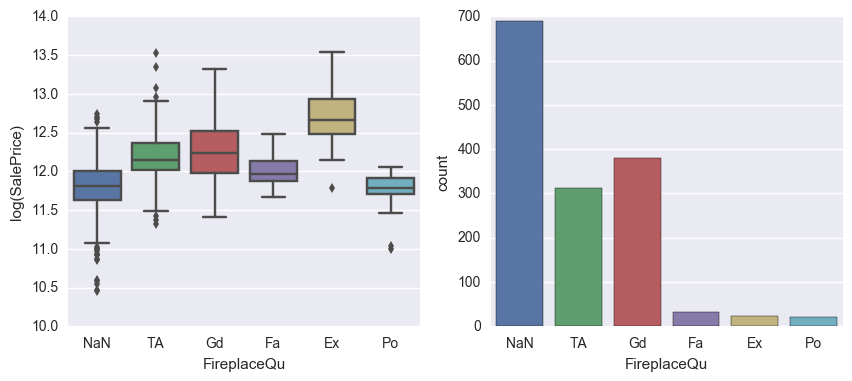

In [66]:
# FireplaceQu
inspect_boxplot(train, 'FireplaceQu', include_missing=True)

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
81 missing values.


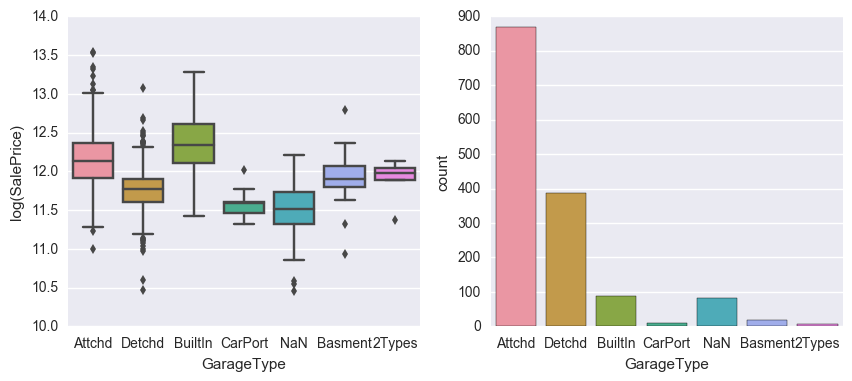

In [67]:
# GarageType
inspect_boxplot(train, 'GarageType', include_missing=True)

81 missing values; 0 zeros.
min = 1900.0; max = 2010.0


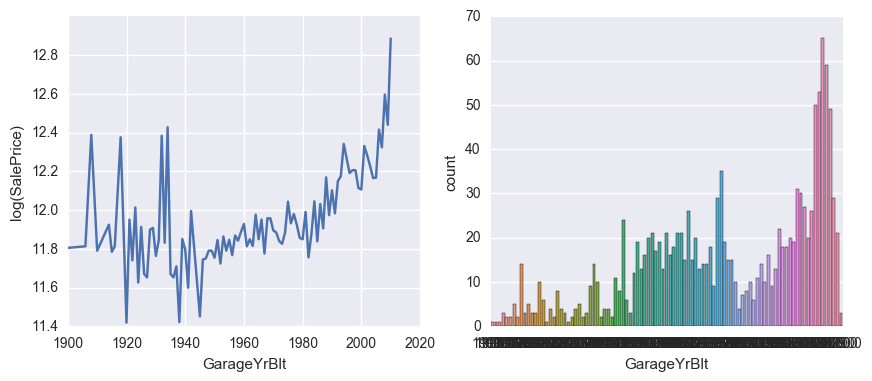

In [68]:
# GarageYrBlt; it has some missing values
inspect_year(train, 'GarageYrBlt')

In [69]:
train[['YearBuilt', 'GarageYrBlt', 'YearRemodAdd']].corr()

,YearBuilt,GarageYrBlt,YearRemodAdd
YearBuilt,1.000000,0.825667,0.592855
GarageYrBlt,0.825667,1.000000,0.642277
YearRemodAdd,0.592855,0.642277,1.000000


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
81 missing values.


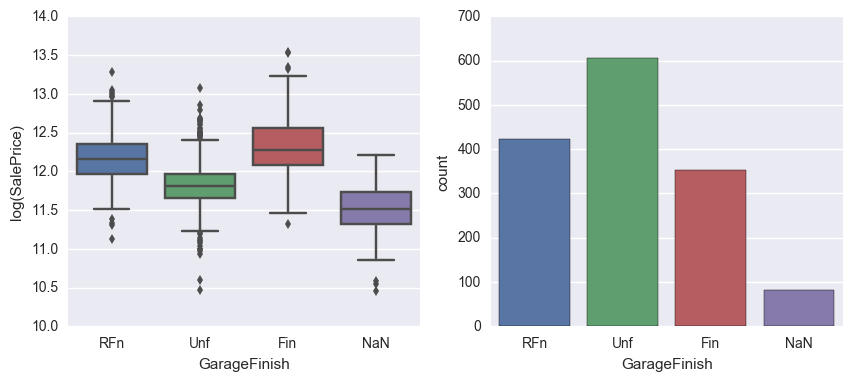

In [70]:
# GarageFinish
inspect_boxplot(train, 'GarageFinish', include_missing=True)

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
0 missing values.


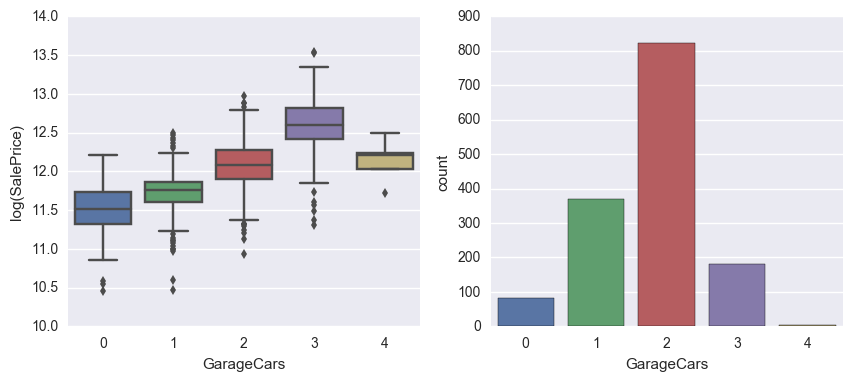

In [71]:
# GarageCars
inspect_boxplot(train, 'GarageCars', include_missing=True)

0 out of 1460 values are missing.
81 out of 1460 values are zero.


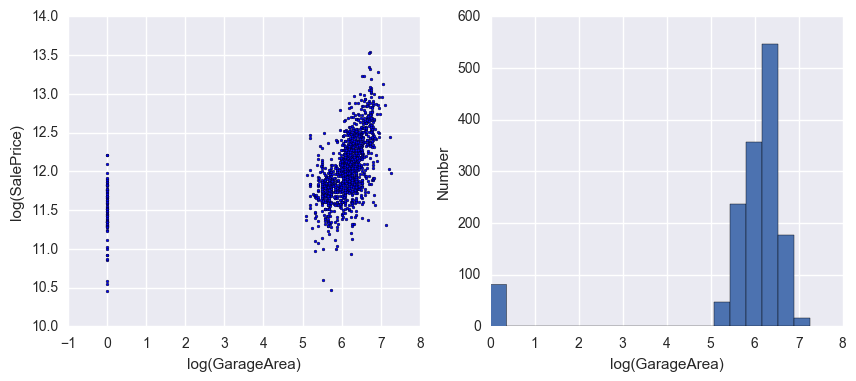

In [72]:
# GarageArea
inspect_scatterplot(train, 'GarageArea')

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
81 missing values.


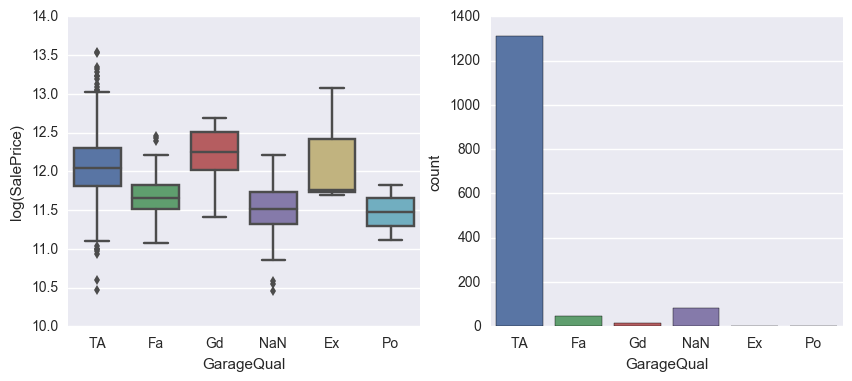

In [73]:
# GarageQual
inspect_boxplot(train, 'GarageQual')

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
81 missing values.


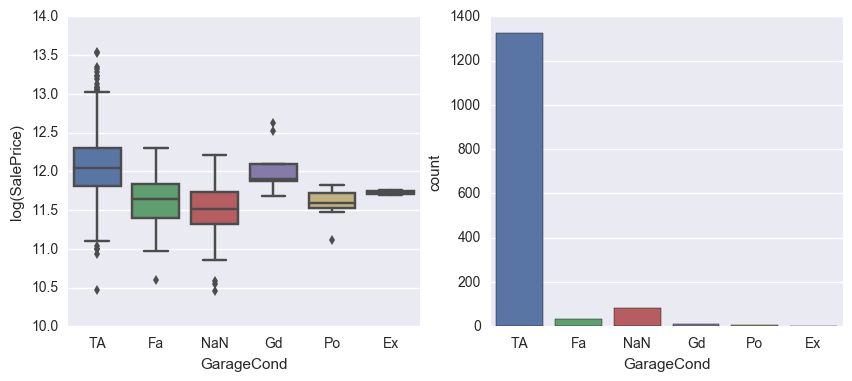

In [74]:
# GarageCond
inspect_boxplot(train, 'GarageCond')

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
0 missing values.


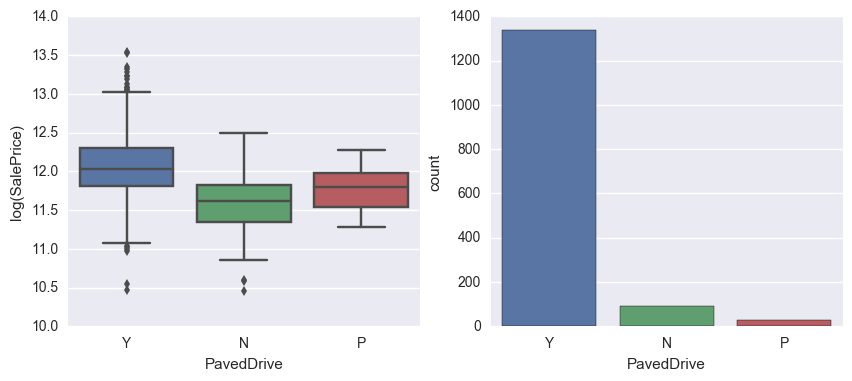

In [75]:
# PavedDrive
inspect_boxplot(train, 'PavedDrive')

0 out of 1460 values are missing.
761 out of 1460 values are zero.


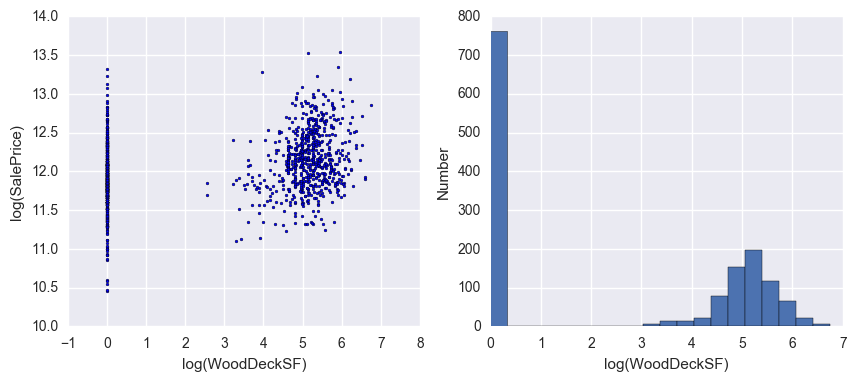

In [76]:
# WoodDeckSF; maybe wood deck FRACTION is more informative?
inspect_scatterplot(train, 'WoodDeckSF')

0 out of 1460 values are missing.
761 out of 1460 values are zero.


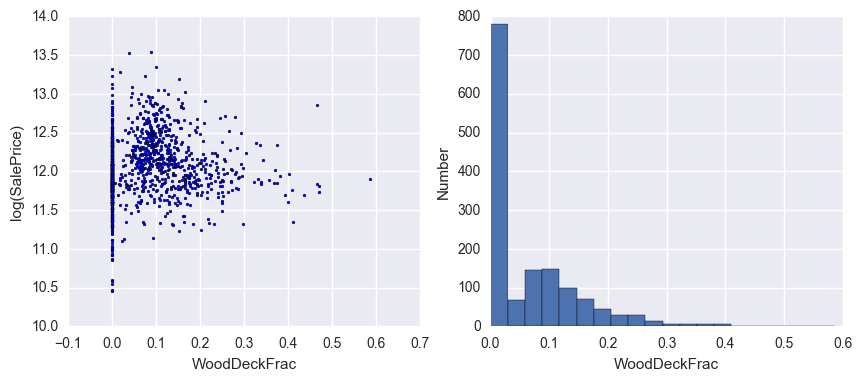

In [77]:
train['WoodDeckFrac'] = train['WoodDeckSF'] / train['GrLivArea']
inspect_scatterplot(train, 'WoodDeckFrac', logx=False)

0 out of 1460 values are missing.
656 out of 1460 values are zero.


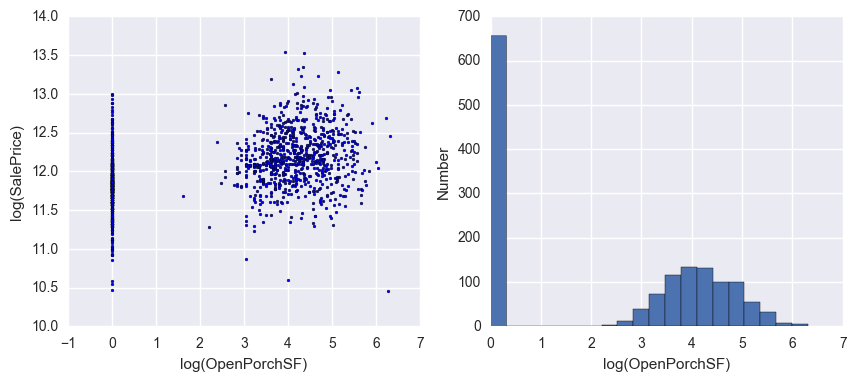

In [78]:
# OpenPorchSF
inspect_scatterplot(train, 'OpenPorchSF')

0 out of 1460 values are missing.
656 out of 1460 values are zero.


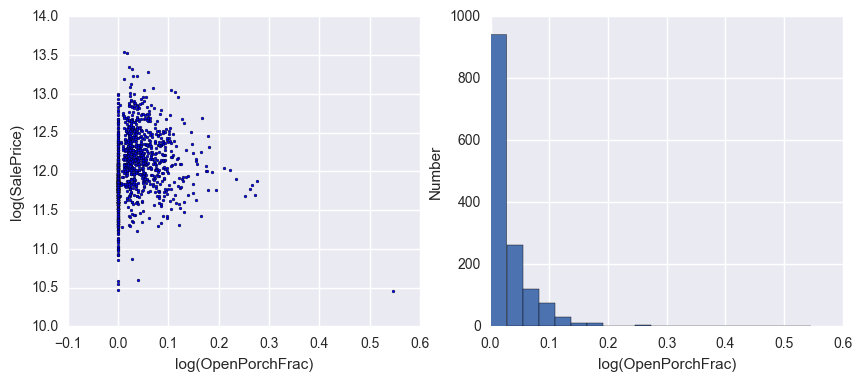

In [79]:
train['OpenPorchFrac'] = train['OpenPorchSF'] / train['GrLivArea']
inspect_scatterplot(train, 'OpenPorchFrac')

0 out of 1460 values are missing.
1252 out of 1460 values are zero.


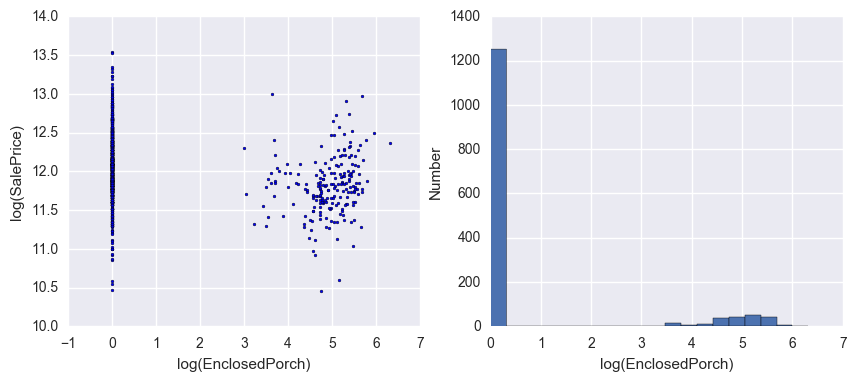

In [80]:
# EnclosedPorch
inspect_scatterplot(train, 'EnclosedPorch')

0 out of 1460 values are missing.
1252 out of 1460 values are zero.


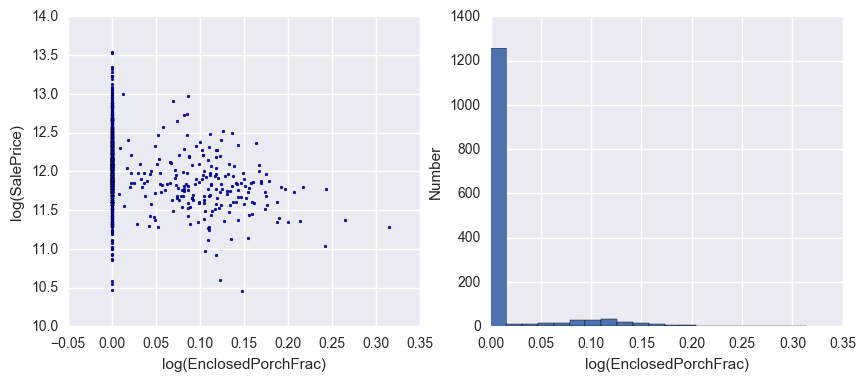

In [81]:
train['EnclosedPorchFrac'] = train['EnclosedPorch'] / train['GrLivArea']
inspect_scatterplot(train, 'EnclosedPorchFrac')

0 out of 1460 values are missing.
1436 out of 1460 values are zero.


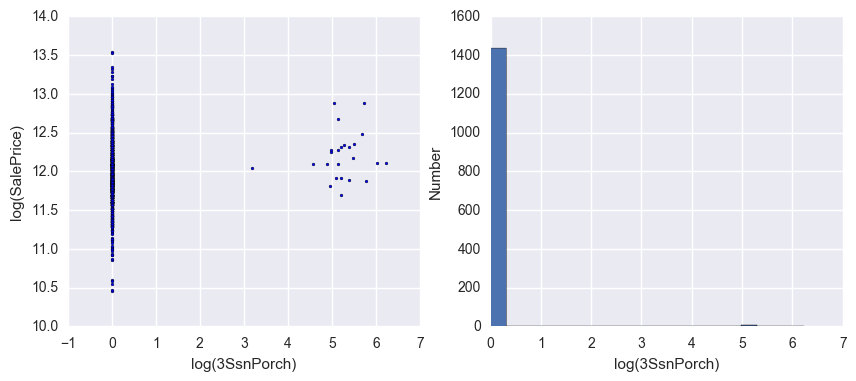

In [82]:
# 3SsnPorch
inspect_scatterplot(train, '3SsnPorch')

0 out of 1460 values are missing.
1344 out of 1460 values are zero.


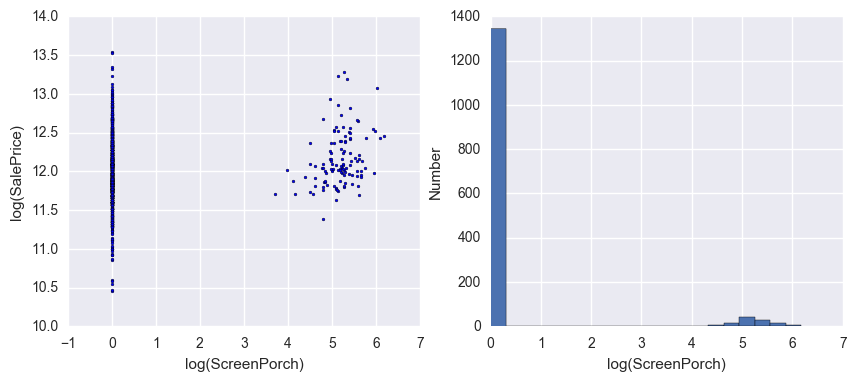

In [83]:
# ScreenPorch
inspect_scatterplot(train, 'ScreenPorch')

0 out of 1460 values are missing.
1453 out of 1460 values are zero.


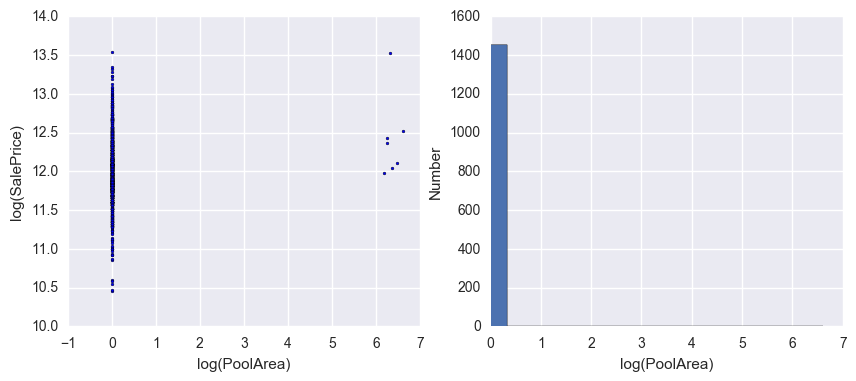

In [84]:
# PoolArea; looks like only very few houses have pools. Are pools good price indicators?
inspect_scatterplot(train, 'PoolArea')

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
1179 missing values.


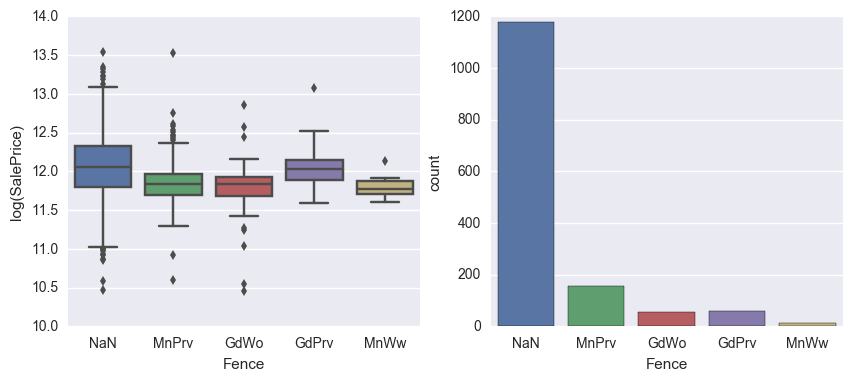

In [85]:
# Fence
inspect_boxplot(train, 'Fence')

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
1406 missing values.


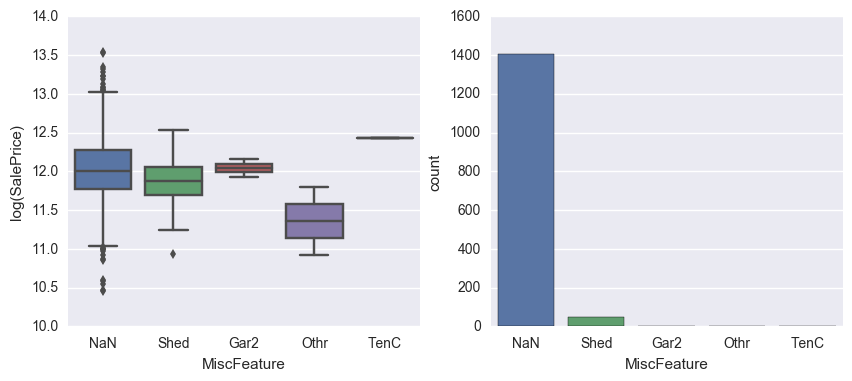

In [86]:
# MiscFeature
inspect_boxplot(train, 'MiscFeature')

0 out of 1460 values are missing.
1408 out of 1460 values are zero.


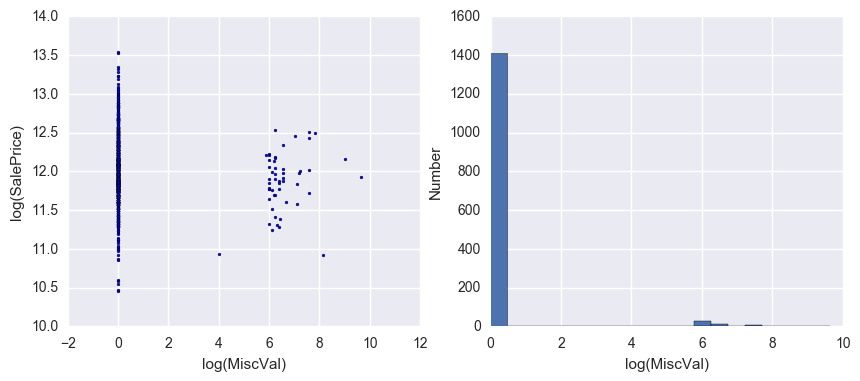

In [87]:
# MiscVal
inspect_scatterplot(train, 'MiscVal')

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
0 missing values.


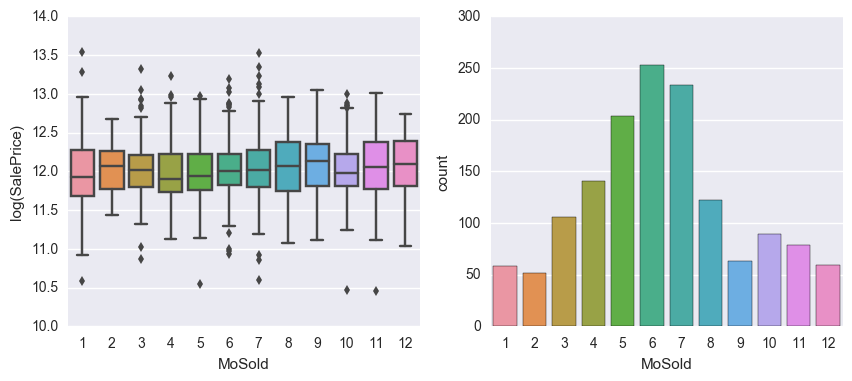

In [88]:
# MoSold; doesn't seem to be a good price indicator. What about when combined with Year?
inspect_boxplot(train, 'MoSold')

0 missing values; 0 zeros.
min = 2006; max = 2010


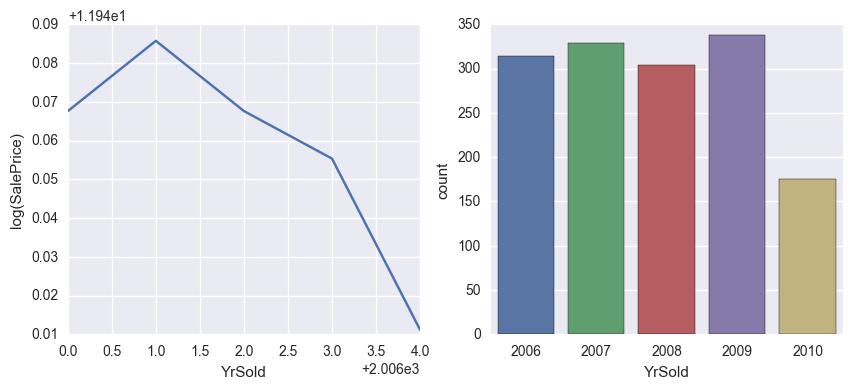

In [89]:
# YrSold
inspect_year(train, 'YrSold')

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
0 missing values.


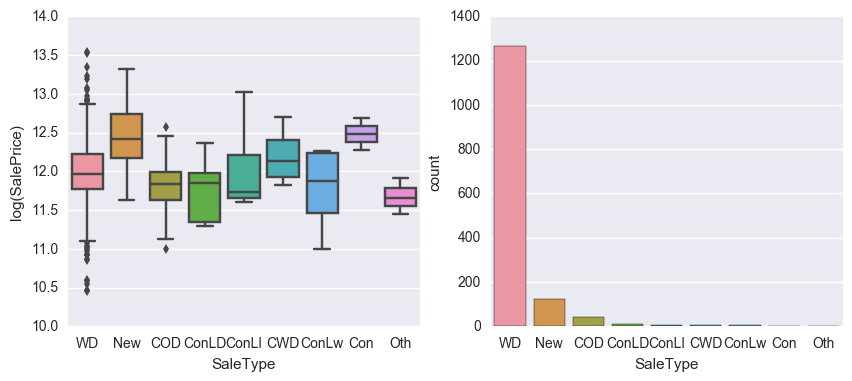

In [90]:
# SaleType
inspect_boxplot(train, 'SaleType')

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
0 missing values.


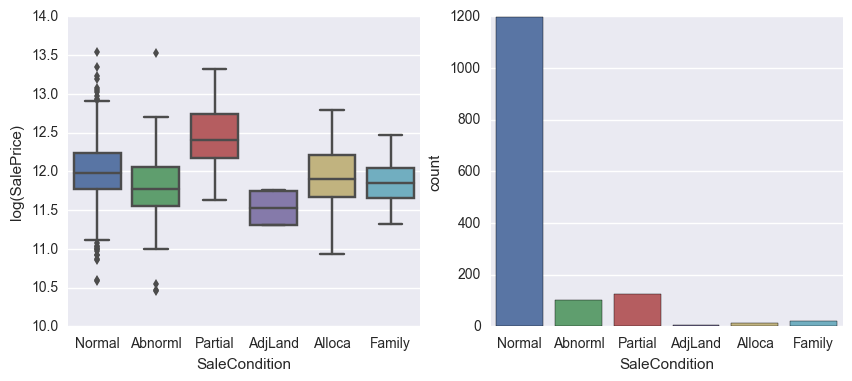

In [91]:
# SaleCondition
inspect_boxplot(train, 'SaleCondition')

### Find a simple way to impute LotFrontage

In [92]:
train[['LotFrontage', 'LotArea']].corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.426095
LotArea,0.426095,1.000000


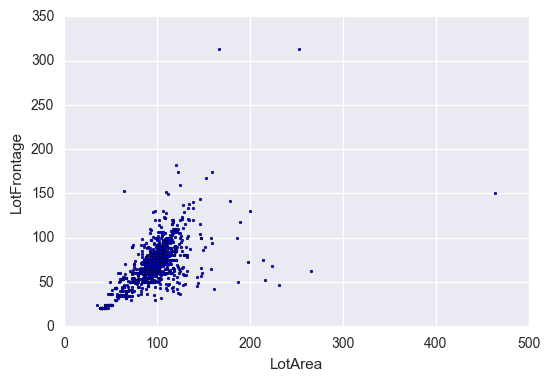

In [93]:
plt.scatter(np.sqrt(train['LotArea']), train['LotFrontage'], s=4)
plt.xlabel('LotArea')
plt.ylabel('LotFrontage')

In [94]:
# Try filling the NaNs with median LotFrontage within each of the 10 LotArea bins
train['LotAreaBins'] = pd.qcut(np.sqrt(train['LotArea']), q=10)
train['LotFrontage'].fillna(train.groupby('LotAreaBins').transform(np.median)['LotFrontage'], inplace=True)

In [95]:
print(train['LotFrontage'].isnull().sum())

0


Below is an Experiment with imputing LotFrontage by building another RF model, but I'd like to use a simpler method than this. Let's see how the simple method performs, and see if the more sophisticated method performs better.

             LotFrontage   LotArea  SalePrice
LotFrontage     1.000000  0.426095   0.351799
LotArea         0.426095  1.000000   0.263843
SalePrice       0.351799  0.263843   1.000000


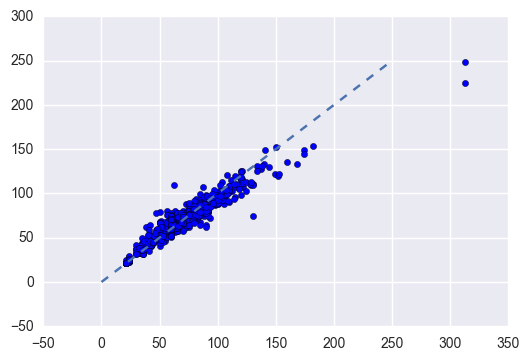

In [96]:
train0 = pd.read_csv('train.csv')
# Explore correlation between LotFrontage and some other area variables
dummies = pd.get_dummies(train0['LotConfig'], prefix='LotConfig')
train0 = pd.concat([train0, dummies], axis=1)
# Is LotFrontage highly correlated (abs(corr) > 0.2) to SalePrice?
print(train0[['LotFrontage', 'LotArea', 'SalePrice']].corr())
# Looks like it is, so build a simple model to estimate LotFrontage from LotArea and LotConfig
df = train0[['LotFrontage', 'LotArea', 'LotConfig_Inside', 'LotConfig_Corner',
             'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3']][train0['LotFrontage'].notnull()]
scaler = StandardScaler()
Y = df['LotFrontage']
X = df[[col for col in df.columns if col not in ['LotFrontage']]]
X = scaler.fit_transform(X)
reg = RandomForestRegressor(n_estimators=100)
reg.fit(X, Y)
plt.scatter(Y, reg.predict(X))
plt.plot([0., 250], [0, 250], ls='--')
# Looks like we have a fair estimate of the missing LotFrontage
LotFrontage_pred = reg.predict(train0[['LotArea', 'LotConfig_Inside', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3']])
LotFrontage_filled = np.where(train0['LotFrontage'].notnull(), train0['LotFrontage'], LotFrontage_pred)